# What are the most Popular and Effective Chess Openings?
##### *A Tutorial by Wilson Kong*
___
## Introduction

Chess is one of the oldest games invented and one that is seemingly impossible to solve despite its age, with near-infinite possibilities built solely upon an 8x8 tiled board and 16 game pieces to a side. One of the most interesting and historical questions pertaining to chess is how you should start your game. In fact, there has been deeply-rooted theorycrafting dating back hundreds and even thousands of years with generations of chess masters and philosophers publishing their findings, corresponding with one another on the theoretically optimal moves and responses. In fact, these are such an integral part of chess theory that many have their own dedicated names such as the Sicilian Defense, Queen's Gambit Declined, or the Berlin Defense. To illustrate both points, one of the most well-known openings, the [King's Gambit](https://en.wikipedia.org/wiki/King%27s_Gambit) has been widely-documented for at least 600 years. Now with chess as a game more popular than ever, partially thanks to the Netflix show *Queen's Gambit*, which is itself named after a chess opening, in addition to many of the computational and data resources we have, we are now able to perform a more extensive analysis on both how well these openings perform and who's using them.

This data science tutorial will walk you through from start to finish of the general data science pipeline from first gathering our data, processing and cleaning our data, visualizing and analyzing the data, interpreting the data (including a bit of machine learning), and communicating any insights we may have drawn from the process. To do so, we'll be extracting data of online chess games played on the website [lichess](https://lichess.org) and performing the aforementioned operations on it.
___
## Necessary Resources

In order to programatically gather and process our data, we will be using Python 3 (you can download the latest version [here](https://www.python.org/downloads/)). This will be the programming language that all of our code will be written in and is the programming language of choice for many data science applications due to its extensive array of relevant external libraries.

Additionally, we'll be using additional resource libraries on top of what is provided to us in the default Python libraries. Appropriate documentation where you can find additional information beyond the brief synopsis provided will be linked.
 * [NumPy](https://numpy.org/doc/stable/): The backbone of a lot of the libraries we'll be using. Contains many fast numerical functions and data structures that allow us to store and manipulate data.
 * [pandas](https://pandas.pydata.org/docs/): Provides a table-like structure called a DataFrame as well as useful functions for filtering and processing data inside of it.
 * [matplotlib](https://matplotlib.org/stable/api/index): A library for plotting figures and graphs we'll use to visualize our data.
 * [scikit-learn](https://scikit-learn.org/stable/user_guide.html): A machine learning library we'll use to generate predictive models to help us analyze and interpret our data.
 * [Regular Expressions](https://docs.python.org/3/library/re.html): A Python module that allows us to use [regex](https://en.wikipedia.org/wiki/Regular_expression) to match strings in our data.
 * [Math](https://docs.python.org/3/library/math.html): A Python module for general math functions. Mostly analagous to similarly-named libraries in other languages.
 * [Python-Chess](https://python-chess.readthedocs.io/en/latest/): A chess-utility library that we'll mainly use to display chess-related information as well as parse our data.

Without further ado, let's import the aforementioned libraries:

In [176]:
## Imports necessary libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import linear_model
import re
import math
import chess
import chess.pgn

___

## Gathering Data

We'll be gathering chess game data from the online chess website lichess via their regularly-updated [database](https://database.lichess.org/#standard_games). The particular dataset we'll be using contains over 10 million games and comes from January 2017, which can be found [here](https://database.lichess.org/standard/lichess_db_standard_rated_2017-01.pgn.bz2), though I recommend that if you are following this tutorial to try to use any one of the other datasets that they offer and see how your results compare.

Additionally, note that the file downloaded from the website is in a compressed archive form and that you'll want to uncompress it before you continue. As recommended by Lichess, use [7zip](https://www.7-zip.org/) if you're on Windows or the built-in command line command [bzcat](https://www.commandlinux.com/man-page/man1/bzcat.1.html) if you're on a Unix-based system like OS X (Mac) or Linux.

In [2]:
# Opens the PGN file where our data is stored

file_name = "jan2017.pgn"
pgn = open(file_name)

Now that we have our file, we have to extract the game data, which is provided to us in the form a PGN ([Portable Game Notation](https://en.wikipedia.org/wiki/Portable_Game_Notation)). In order to turn this into something we can use, we have to *parse* it. Luckily for us, our Python-Chess library has a function for this! Note that PGN files contain headers which contain information such as Players, Site, their Elo, and the game outcome as well as the game in standard notation (ex. 1. e4 e5 2. Nf3 Nc6...). We aren't as concerned with the actual game, so we'll only worry about the headers. You can find more on the PGN format on Lichess' database documentation.

To make our dataset more manageable, we'll be importing roughly half of the games in the dataset (around 5 million). This step can run for quite a while depending on how large your dataset is. Also note that the more you scale your dataset, the slower other processes involving analyzing and readying the data will take.

In [3]:
# Sets up a pandas DataFrame that will hold our data

games_df = pd.DataFrame()

# Gets an arbitrary first 5 million entries in chunks of 100,000

for i in np.arange(0, 50):
    data = list()

    for j in np.arange(0, 100000):
        # Uses the chess library to parse the PGN into a Python dictionary
        
        data.append(dict(chess.pgn.read_headers(pgn)))
    
    # Appends the data chunk into our main DataFrame
    data_df = pd.DataFrame(data)
    games_df = games_df.append(data_df, ignore_index=True)

games_df.head()

,Event,Site,White,Black,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,WhiteTitle,BlackTitle
0,Rated Classical tournament https://lichess.org...,https://lichess.org/2lAzqJ9u,Asia_01,Pakus,0-1,1587,+12,?,?,Abandoned,600+0,2016.12.31,23:00:01,1622,-13,NaN,NaN
1,Rated Classical tournament https://lichess.org...,https://lichess.org/5utpphVs,cronopiodano,Magnataroniell,1-0,1690,-11,B10,Caro-Kann Defense: Euwe Attack,Time forfeit,600+0,2016.12.31,23:00:01,1708,+11,NaN,NaN
2,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/xUn53e0k,MarlonTeixeira21,caguertti,0-1,1614,+13,B30,Sicilian Defense: Old Sicilian,Time forfeit,300+0,2016.12.31,23:00:01,1661,-13,NaN,NaN
3,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/Z5NSdZX4,WinterSnowStorm,theivi,1-0,1893,-9,D35,"Queen's Gambit Declined: Exchange Variation, P...",Normal,300+0,2016.12.31,23:00:01,1968,+9,NaN,NaN
4,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/RyirpGs3,walt_b,james205,0-1,1461,+5,C44,Ponziani Opening,Normal,300+0,2016.12.31,23:00:01,1204,-4,NaN,NaN


Now that we have our data in a table format, let's move on to manipulating it so it can suit our needs better.
___

## Data Cleaning and Modification

You may have noticed that we have a lot of columns like `White/BlackTitle` or `Event` that quite frankly won't be very useful to us for the purpose we intend to use the data. What we can do is drop them using pandas. Let's go over the data that we *are* keeping and why we're doing so:
 * **Result**: This variable tells us who won or lost the game (or if it was a draw). This will be used when we evaluate the effectiveness of each opening.
 * **BlackElo** & **WhiteElo**: This is a general gauge at how strong each player is (the higher the stronger). We'll use this in assessing how effective each Opening is as well as how popular certain openings are between various skill levels.
 * **Termination**: This tells us how the game ended and we can use it to filter out unwanted games in the next step.
 * **Opening**: Evidently, if we want to assess opening popularity and effectiveness, we need to know which opening is used every game.

In [28]:
# Drops unnecessary columns in the DataFrame

games_df = games_df.drop(["Event", "Site", "White", "Black", "BlackRatingDiff", "WhiteRatingDiff", \
    "ECO", "TimeControl", "UTCDate", "UTCTime", "WhiteTitle", "BlackTitle"], axis=1)

# Restructures the columns

games_df = games_df.reindex(["Opening", "WhiteElo", "BlackElo", "Result", "Termination"], axis="columns")
games_df.head()

,Opening,WhiteElo,BlackElo,Result,Termination
0,?,1622,1587,0-1,Abandoned
1,Caro-Kann Defense: Euwe Attack,1708,1690,1-0,Time forfeit
2,Sicilian Defense: Old Sicilian,1661,1614,0-1,Time forfeit
3,"Queen's Gambit Declined: Exchange Variation, P...",1968,1893,1-0,Normal
4,Ponziani Opening,1204,1461,0-1,Normal


As mentioned, we would revisit the `Termination` column. Let's examine this a bit closser:

In [29]:
# Creates a list of all values that are part of "Terminated"

unique_terms = pd.unique(games_df["Termination"])

# Prints a pair of Termination Method, Entries Categorized

for term in unique_terms:
    amount = (games_df.loc[games_df["Termination"] == term]).count()[0]
    print(f"{term}, {amount}")

Abandoned, 25999
Time forfeit, 1542215
Normal, 3431039
Unterminated, 19
Rules infraction, 728


You'll notice that the vast majority of games end in a *Normal* fashion (one player resigns or a draw is agreed to, or a [game-defined end](https://en.wikipedia.org/wiki/Chess#End_of_the_game) including checkmates, stalemates, or repetitions) or are a Timeout (one player runs out of time). For our purposes, we really only want games that are decisive, as we can better attribute the final outcome of the game to a measured variable in those cases, so the *Normal* method of termination would be most useful to us. However, we should seriously consider how other data entries (especially if those observations are linked by some variable) will affect our dataset in terms of biases. 

Most importantly, we should be asking ourselves if there are any observed or unobserved variables that may *cause* a game to terminate in a non-normal fashion. Using this point as guidance, we can reason the following:
 * `Rules infraction` termination results from one or both players being detected of cheating (usually by the use of [Chess engines](https://en.wikipedia.org/wiki/Chess_engine) to aid their gameplay). While it is likely that these *will* be affect our openings observations as engines usually prefer specific openings, we should be able to drop them because even if we do include them, they don't provide us any useful insights of which openings are strongest in practice and bias our data toward the engine-favorite openings. As they reflect extarordinary gameplay, we don't want these entries in our dataset.
 * `Unterminated` games result from substantial circumstances, and there likely aren't any direct causes from observations. Therefore, these can be considered [Missing Completely at Random](https://en.wikipedia.org/wiki/Missing_data#Missing_completely_at_random) (MCaR) and can safely be dropped.
 * `Abandoned` games simply happen when both players leave the lobby. It is unlikely that any observations, recorded or unrecorded will cause a game to more likely be abandoned. We can once again consider these MCaR and drop them.
 * Lastly, we have `Time forfeit` games. These are where one player's allocated time within a game runs out and thus counts as an automatic loss for them. In practice, these are completely valid games and make up a substantial portion of game outcomes. Some openings may produce more complex positions such as those that lead to the queens more likely staying on the board or ones that leave significant game tension in the center. Thus, we can't safely drop these without potentially introduces large amounts of bias in our data. What we will do, however, is exclude them from our analysis of opening effectiveness as the outcome they provide is difficult to tie back to the opening but allow them to be included in opening popularity.

In [66]:
# Drops all rows that don't terminate normally or in a time forfeit.

games_df = games_df[(games_df["Termination"] == "Normal") | (games_df["Termination"] == "Time forfeit")]
print(f"Number of entries: {games_df.shape[0]}")
games_df.head()

Number of entries: 4970450


,Opening,WhiteElo,BlackElo,Result,Termination
1,Kann Defense,1708,1690,1-0,Time forfeit
2,Sicilian Defense,1661,1614,0-1,Time forfeit
3,Queen's Gambit Declined,1968,1893,1-0,Normal
4,Ponziani Opening,1204,1461,0-1,Normal
5,King's Gambit Declined,1859,1772,1-0,Normal


As a last bit of cleaning, let's work on the opening column. We'll notice that in many cases, we have what is known as an opening variation denoted by the form `Opening: Variation`, `Opening, Variation` or `Opening #X` format. These are usually continuations of openings that are significant enough to be named. However, this branching off into sometimes hundreds of variations won't give us the best data and more importantly, goes behind the motivation of why we're analyzing openings in the first place. Instead, what we can do is ignore the variation and focus on the opening itself. We'll extract this by way of Regex.

Before we do that though, we should consider the case if a player ran out of time in the first few moves in which no opening was played. Lichess will designate the opening as `?`. In this case, we can generally drop this as this piece of missing data as the missingness of this observation isn't dependent on any other variable, so we can't reasonably [impute](https://en.wikipedia.org/wiki/Imputation_(statistics)) it.

In [31]:
# Drops rows in which the opening is unknown

games_df = games_df[games_df["Opening"] != "?"]

# Creates a regex to extract the opening

regex = re.compile("([\w\s\']*)(:.*| #.*|,.*)")

# Creates a map function that takes in an opening and outputs the extracted opening value based on the regex
# If there is no variation attached, returns the input opening

def extract_opening(opening):
    result = re.search(regex, opening)
    if result:
        return result.group(1)
    else:
        return opening

# Uses the function to map the Opening column

games_df["Opening"] = (games_df["Opening"]).apply(extract_opening)
games_df.head()

,Opening,WhiteElo,BlackElo,Result,Termination
1,Kann Defense,1708,1690,1-0,Time forfeit
2,Sicilian Defense,1661,1614,0-1,Time forfeit
3,Queen's Gambit Declined,1968,1893,1-0,Normal
4,Ponziani Opening,1204,1461,0-1,Normal
5,King's Gambit Declined,1859,1772,1-0,Normal


Lastly, there is one special edge case when it comes to how lichess classifies openings. The [Chigorin Defense](https://en.wikipedia.org/wiki/Chigorin_Defense) variation to the [Queen's Gambit Declined](https://en.wikipedia.org/wiki/Queen%27s_Gambit_Declined) is referenced as `Queen's Gambit Refused` in our dataset, which evades our regex filtering! Of course, this should be classified to Queen's Gambit Declined which we will fix in the following code. I do believe this inconsistency may have been fixed in newer datasets (at least from viewing their updated openings book), so you may not have to perform this extra step.

In [40]:
# Replaces instances of Queen's Gambit Refused with Queen's Gambit Declined

games_df["Opening"] = games_df["Opening"].replace("Queen's Gambit Refused", "Queen's Gambit Declined")

# Housekeeping by converting the data to a numpy numeric value

games_df["BlackElo"] = pd.to_numeric(games_df["BlackElo"])
games_df["WhiteElo"] = pd.to_numeric(games_df["WhiteElo"])

print(games_df.loc[games_df["Opening"] == "Queen's Gambit Refused"])

Empty DataFrame
Columns: [Opening, WhiteElo, BlackElo, Result, Termination]
Index: []


All instances have been replaced. As a last step, let's check if there's any lingering missing data we may have to deal with before we move on to data analysis and visualization.

In [52]:
print(pd.isna(games_df).sum())

Opening        0
WhiteElo       0
BlackElo       0
Result         0
Termination    0
dtype: int64


Look's like we're all clear! Now that we're done preparing out data for our needs, we can begin with the next step.
___
## Data Analysis & Visualization

Now that we have our data in a workable format, we can begin to plot and visualize it. We want to analyze both the popularity of various openings as well as how effective they appear to be when it comes to winning games. Let's begin with popularity.

#### Opening Popularity

Let us begin by assessing over the entire playerbase, which openings are the most popular. We'll be making a plot of only the top 50 openings due to space limitations and frankly, overcrowding the plot with diminishingly useful observations makes it hard to read. We'll be plotting both relative popularity as well as absolute popularity where they're defined as follows:
 * **Relative Games Played** - The percentage of all games played that use the given opening.
 * **Absolute Games Played** - The raw number of games played that use the given opening.

Note that as the difference between the relative and absolute games played is simply from scaling by a constant value (total games played), the plots should in theory look the same and we'll be able to simply use a separate axis for the other measurement.

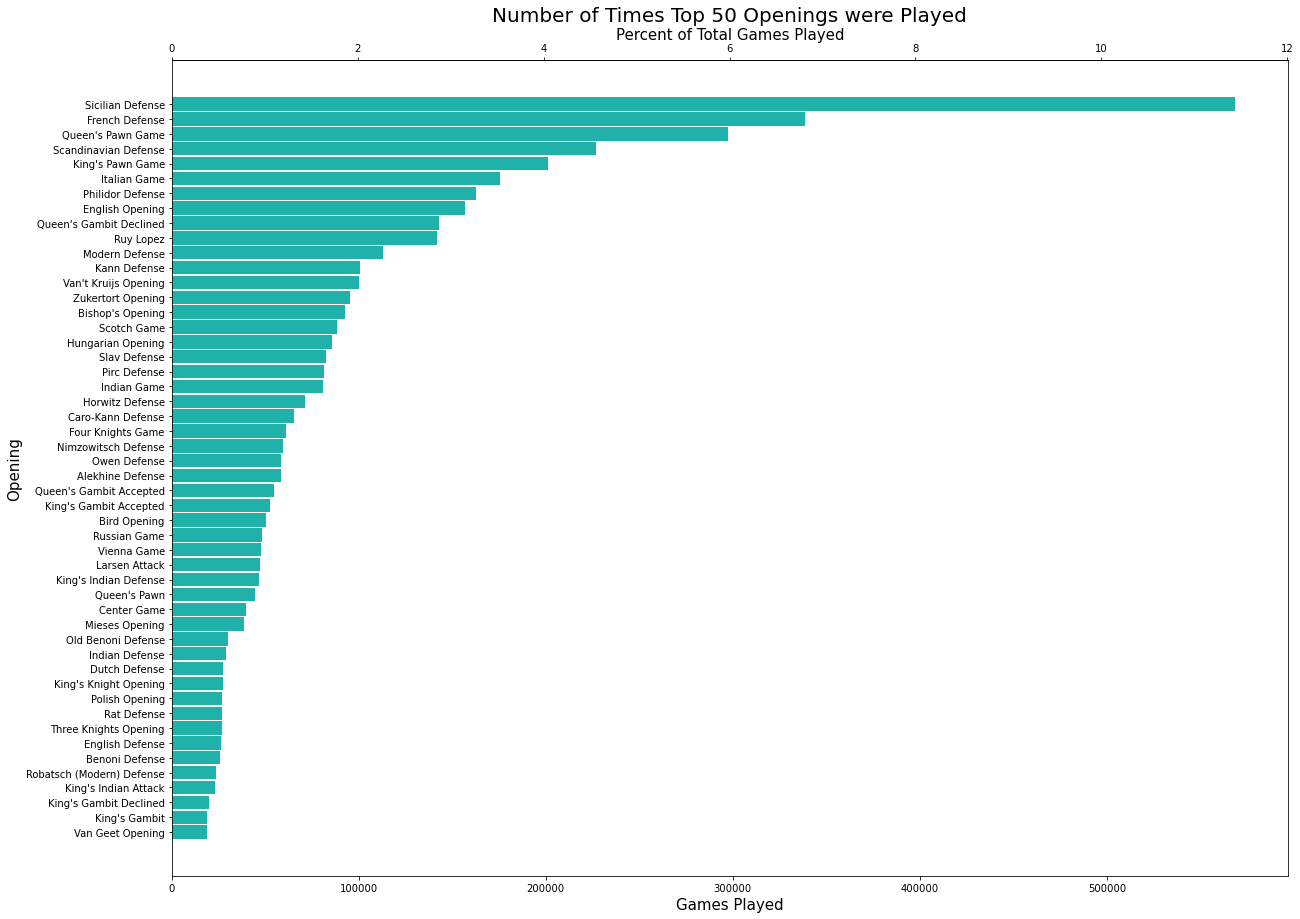

In [209]:
# Obtains an array of the top 50 openings with absolute counts

all_count = games_df["Opening"].value_counts()
total = all_count.sum()
counts = all_count.head(50)

# Plots a horizontal bar graph of absolute opening counts

fig1, ax1 = plt.subplots(figsize=(20, 15))

ax1.barh(np.arange(len(counts)), counts, height=0.9, color="lightseagreen")
ax1.set_title("Number of Times Top 50 Openings were Played", fontdict={"fontsize": 20})
ax1.set_xlabel("Games Played", fontdict={"fontsize": 15})
ax1.set_ylabel("Opening", fontdict={"fontsize": 15})
ax1.set_yticks(np.arange(len(counts)))
ax1.set_yticklabels(counts.index)
ax1.invert_yaxis()

# Creates a second axis for relative opening counts

ax1_sec = ax1.secondary_xaxis("top", functions=(lambda x: 100 * x / total, lambda y: y * total / 100))
ax1_sec.set_xlabel("Percent of Total Games Played", fontdict={"fontsize": 15});

Now that we've visualized a portion of the data, let's observe this figure and try to point out some general trends:
 * Quite clearly, it appears that the Sicilian defense is by far and away the most popular opening despite barely reaching over half a million games over our total of almost 5 million samples. The next most-played opening, the French Defense, is played less than 2/3 as much.
 * Further, we notice that the most popular openings seemingly take up the majority of games played. In fact, it seems that the top 10 most-played openings make up the majority of all games played, despite there being over 100 unique openings featured within this dataset. Note that despite the figure appearing to visually depict skewed data, this is not so for two reasons: firstly, the value_counts() function automatically sorts the tallies so it'll always appeared skewed, but more importantly, we are dealing with [Nominal Data](https://en.wikipedia.org/wiki/Categorical_variable#Notation) and have no clear inherent ordering (what makes one opening greater than another?).
 * Lastly, this ties back into the previous observations, but looking at the top 50 openings, we see a very large majority of all games played. This means we are missing very few games relative to the total dataset by omitting the other games from this figure.

Given this overall picture, let's examine how player skill, measured by Elo, affects players' choice of openings.
To do this, we'll take the average Elo of both players for both games. Although this isn't a perfect measurement of the skill range in the game, especially for those with high rating differences, this should serve as a decent gauge of skill level associated with each game. We can then group players into rating groups starting from the minimum rating in increments of 400. This is due to special circumstances in how the Elo system is designed that we'll get into further when we discuss evaluating performance. Although this creates relatively uneven groups, is important when considering player skill level within those groups. We'll then look at the Top 20 openings for each interval of players and analyze the figures from there.

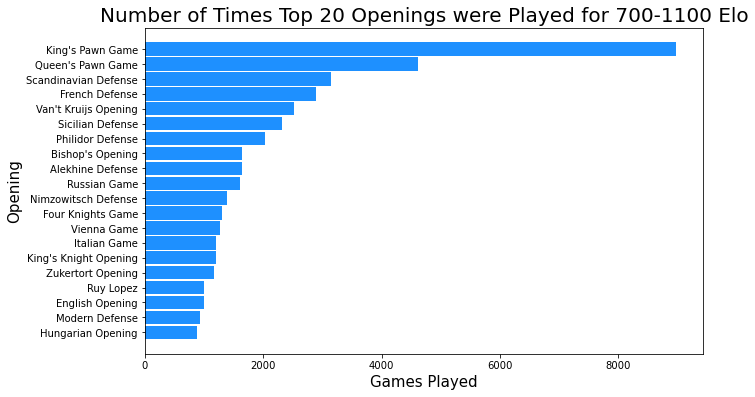

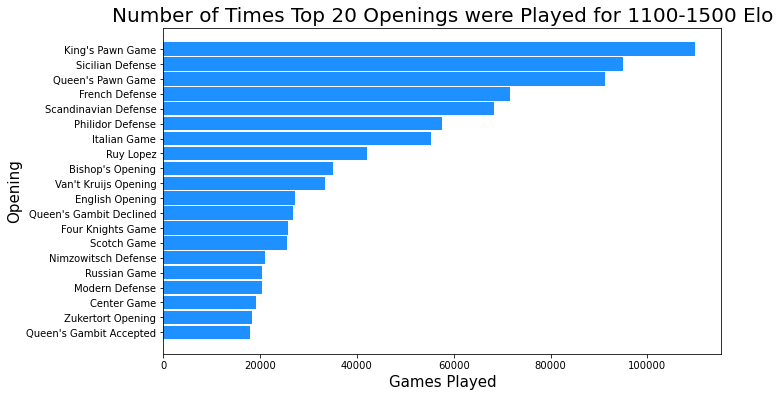

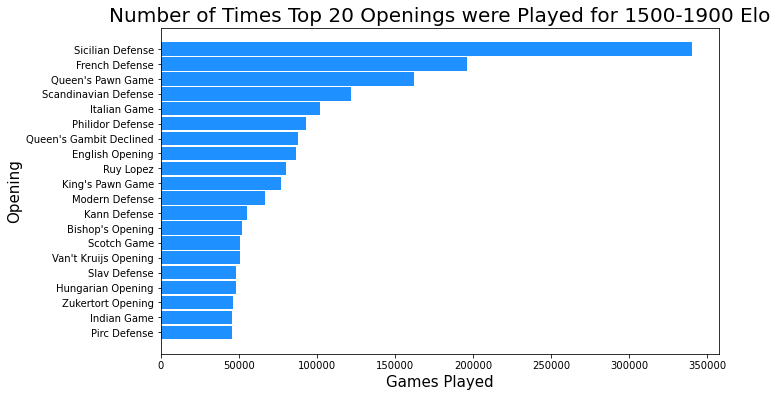

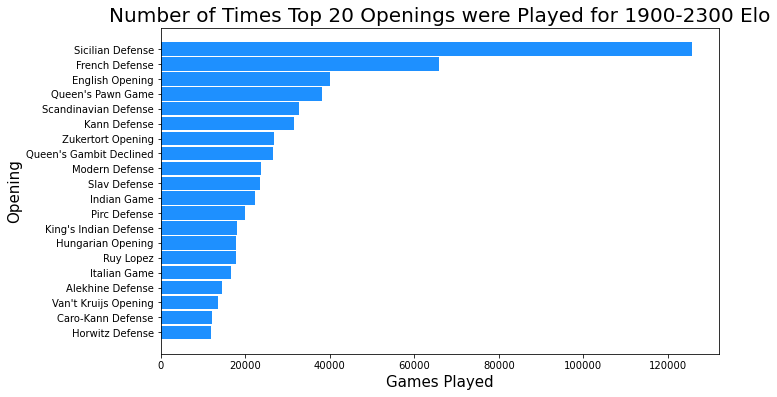

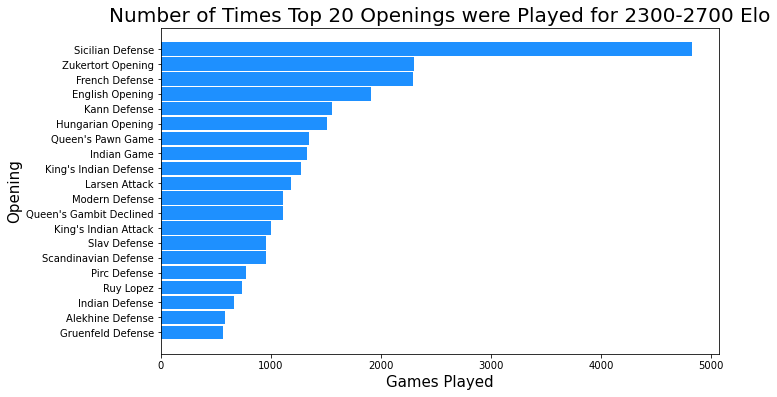

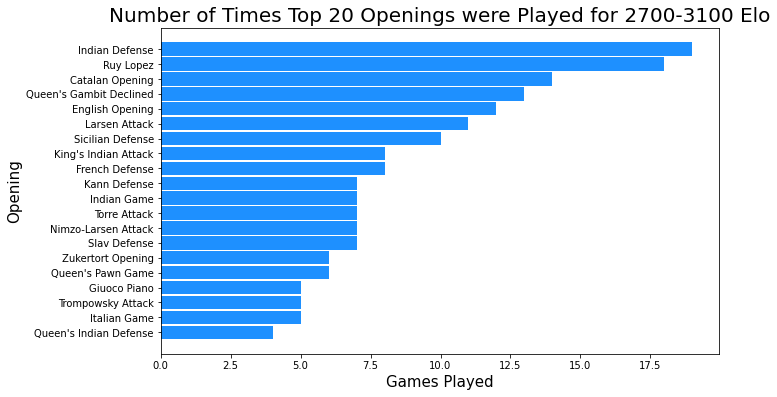

In [208]:
# Creates an array of the average ELO for each game.

avg_elo = (games_df["BlackElo"] + games_df["WhiteElo"]) / 2

# Creates cutoffs for each section and lists to store values

ranges = np.arange(int(min(avg_elo) / 100) * 100, math.ceil(max(avg_elo) / 100) * 100, 400, dtype=int)
labels_list = []
counts_list = []

# Draws a figure of the top 20 openings used for each rating group.

for lower in ranges:
    in_range = games_df.loc[(((games_df["BlackElo"] + games_df["WhiteElo"]) / 2) >= lower) & (((games_df["BlackElo"] + games_df["WhiteElo"]) / 2) < (lower + 400))]
    in_range_all_count = in_range["Opening"].value_counts()
    sum = in_range_all_count.sum()
    in_range_counts = in_range_all_count.head(20)

    fig2, ax2 = plt.subplots(figsize=(10, 6))

    ax2.barh(np.arange(len(in_range_counts)), in_range_counts, height=0.9, color="dodgerblue")
    ax2.set_title(f"Number of Times Top 20 Openings were Played for {lower}-{lower + 400} Elo", fontdict={"fontsize": 20});
    ax2.set_xlabel("Games Played", fontdict={"fontsize": 15})
    ax2.set_ylabel("Opening", fontdict={"fontsize": 15})
    ax2.set_yticks(np.arange(len(in_range_counts)))
    ax2.set_yticklabels(in_range_counts.index)
    ax2.invert_yaxis()

    labels_list.append(f"{lower}-{lower + 400}")
    counts_list.append(in_range_all_count)

A few interesting observations appear. 
* Firstly, it looks like the highest rated players (2700+) and lowest rated players (1100-) prefer drastically different openings from the majority of users, which are heavily concentrated in the 1100-1900 Elo range.
* Additionally, intuitively, the top openings for the largest group of players (1100-1900 Elo) match pretty closely with the overall most popular openings. This does make sense given that the largest group would have the most weight in opening usage.

If we want to further look into how opening usage changes over time, we can plot the relative usage of some of the top openings on a single chart. Let's use the top 10, for instance.

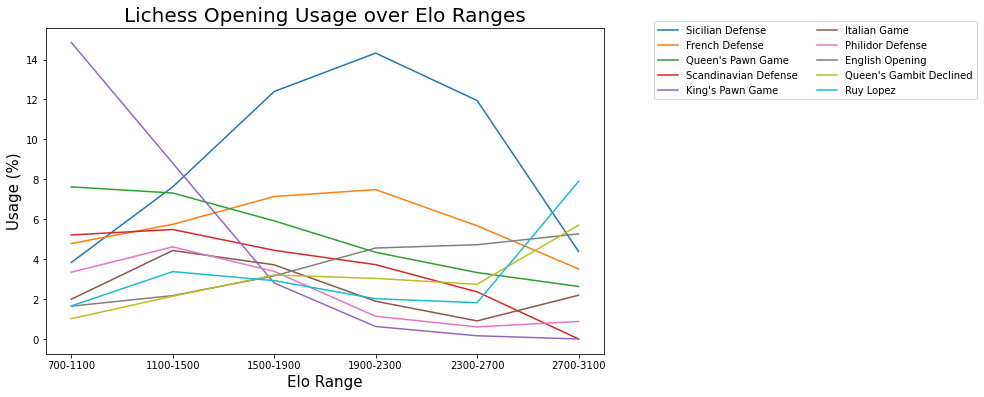

In [216]:
# Sets up variables for plotting.

fig3, ax3 = plt.subplots(figsize=(10, 6))
top_10 = all_count.head(10).index
legend3 = list(top_10)

# Plots the percentage 

for opening in top_10:
    x3 = labels_list
    y3 = []
    for count in counts_list:
        if opening in count.index:
            y3.append(100 * count[opening] / count.sum())
        else:
            y3.append(0)
    ax3.plot(x3, y3)

ax3.set_title("Lichess Opening Usage over Elo Ranges", fontdict={"fontsize": 20})
ax3.set_xlabel("Elo Range", fontdict={"fontsize": 15})
ax3.set_ylabel("Usage (%)", fontdict={"fontsize": 15})
ax3.legend(legend3, ncol=2, bbox_to_anchor=(1.08, 1.035));

Some interesting trends and reinforcement of previously-observed trends appear, particularly regarding the Sicilian Defense in it being popular with the majority of the playerbase except for the two extremes. Further, we see the same in a slightly less-pronounced way with the French Defense. The King's Pawn and Queen's Pawn games become much less-used over larger Elo ratings, likely because players use more established openings and lines. We also see the Ruy Lopez, or Spanish Game becoming very popular at the top level.

### Opening Effectiveness

In order to evaluate effectiveness, we need to evaluate how well a certain opening contributes to a win, draw, or loss for a player. A naïve way to go about this would simply be to count the number of wins, losses, and draws games that follow an opening result in, but this does not take into perhaps another factor that may affect the win result and that's player skill level. For example, if a grandmaster wins against an amateur with a specific opening, we can likely say that the opening didn't make as much of a difference compared to a game with two amateurs. Still, for the sake of comparison, let us implement this.

Additionally, as mentioned before, we will exclude timeout results from this analysis as they aren't as decisive as games terminating in a normal fashion.

Text(0, 0.5, 'Opening')

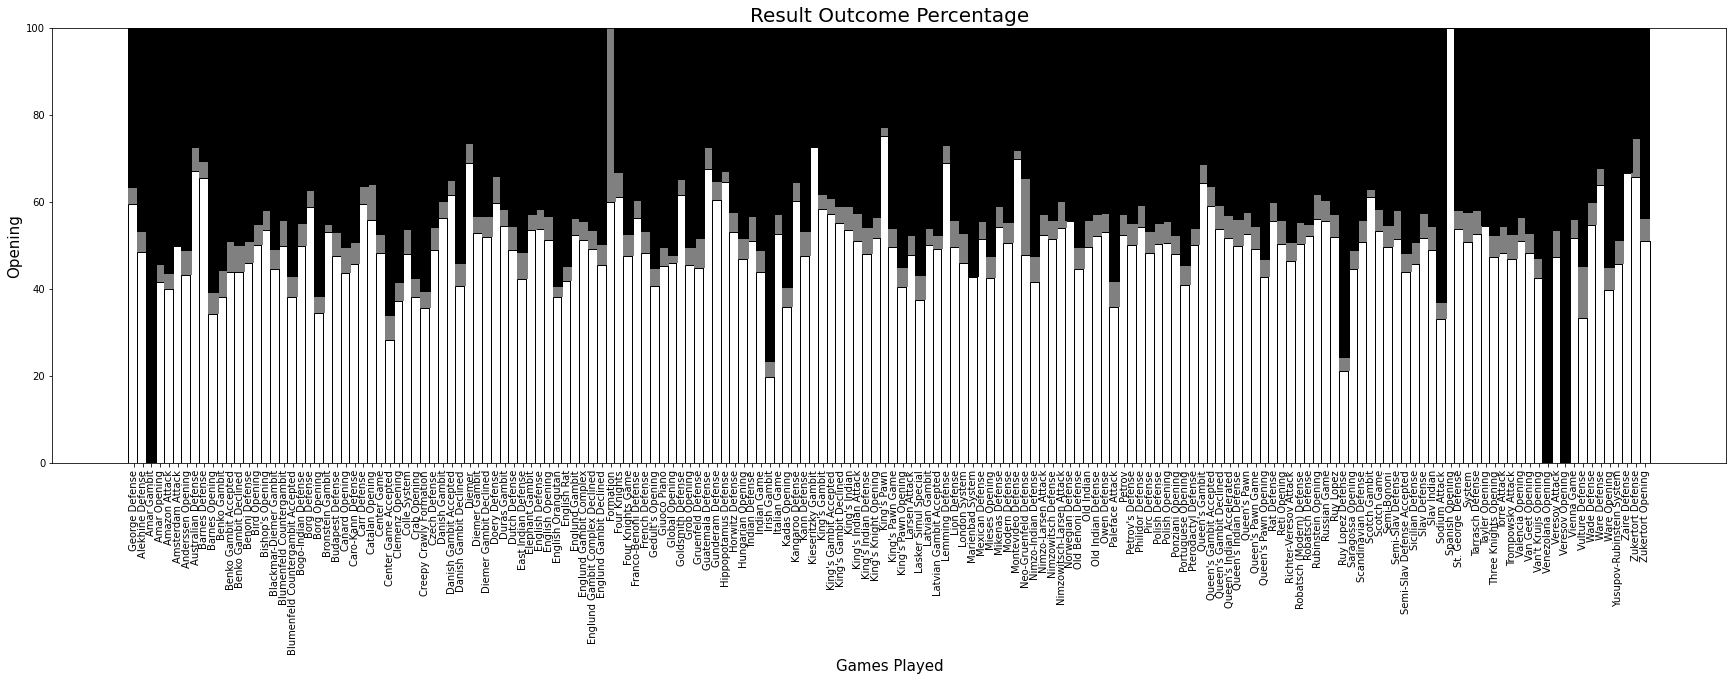

In [272]:
# Gets a slice of all games that normally terminate

normal_df = games_df.loc[games_df["Termination"] == "Normal"].copy()

fig4, ax4 = plt.subplots(figsize=(30, 8))
win = []
draw = []
loss = []
colors = {"0-1": "red", "1-0": "green", "1/2-1/2": "gray"}
x4 = normal_df["Opening"].unique()
x4.sort()

# Gets win/draw/loss for each opening

for opening in x4:
    opening_slice = normal_df.loc[normal_df["Opening"] == opening]
    result_count = opening_slice["Result"].value_counts()
    opening_size = opening_slice.shape[0]

    if "1-0" in result_count.index:
        win.append(100 * result_count["1-0"] / opening_size)
    else:
        win.append(0)
    
    if "1/2-1/2" in result_count.index:
        draw.append(100 * result_count["1/2-1/2"] / opening_size)
    else:
        draw.append(0)
    
    if "0-1" in result_count.index:
        loss.append(100 * result_count["0-1"] / opening_size)
    else:
        loss.append(0)

# Plots the win/draw/loss for each opening

ax4.bar(np.arange(len(x4)), win, width=1.2, color="white", edgecolor="black")
ax4.bar(np.arange(len(x4)), draw, bottom=np.array(win), width=1.2, color="gray")
ax4.bar(np.arange(len(x4)), loss, bottom=np.array(win) + np.array(draw), width=1.2, color="black")

ax4.set_xticks(np.arange(len(x4)))
ax4.set_xticklabels(x4, rotation=90)
ax4.set_title("Result Outcomes of Openings", fontdict={"fontsize": 20})
ax4.set_xlabel("Opening", fontdict={"fontsize": 15})
ax4.set_ylabel("Result Outcome Percentaged", fontdict={"fontsize": 15})

From a preliminary view, it looks like most openings hover around 50% win percentage for white with some exceptions due to low sample count. It also appears that as a whole, draws are relatively infrequent in onlien play on lichess. Now we have doen this approach, let us discuss how we can incorporate the factor of skill into our analysis.

Luckily for us, Chess has a way to correct for this in the [Elo Rating System](https://en.wikipedia.org/wiki/Elo_rating_system). This is a numeric-based system that attempts to quantify player skill based on their past performance against other ranked players. The general concept is that if you win against an opponent, you gain rating, if you lose, you'll lose rating, and if you draw, you'll gain rating if your opponent is better than you and lose rating if the opposite is true. Thus, players who win consistently against better players will have the highest Elo rating.

The way Elo predicts your expected score (Win = 1, Draw = 0.5, Loss = 0) is via a [calculation](https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details) based on the difference between the two players' ratings and is standardized logmarithimically every 400 Elo rating. From here, we can take the actual result and weight it accordingly based on how extraordinary the result is. For example, if the Elo system rates a player's expected score at 0.9, they essentially have a 90% of winning excluding draws. If they win, then it's generally expected based on the skill rating. If they lose, however, it's generally a pretty large upset. We can take the proability of `White` winning and subract it from the result. This should give us a normalized variable within (-1, 1) to measure the effect of the opening.

In [274]:
# Adds a column of expected score for white.

normal_df["ExpectedScore"] = 1 / (1 + (10 ** ((normal_df["BlackElo"] - normal_df["WhiteElo"]) / 400)))

# Defines a function to translate result to actual score.

def score(result):
    if result == "1-0":
        return 1.0
    elif result == "0-1":
        return 0.0
    else:
        return 0.5

# Adds an adjusted score column to the DataFrame which demonstrates the score with Elo based on skill factored in.

normal_df["AdjustedScore"] = (normal_df["Result"].apply(score) - normal_df["ExpectedScore"])

# Drops the termination column as it is implied these are all normal terminations.

normal_df = normal_df.drop(labels=["Termination"], axis="columns")
normal_df.head()

,Opening,WhiteElo,BlackElo,Result,ExpectedScore,AdjustedScore
3,Queen's Gambit Declined,1968,1893,1-0,0.606288,0.393712
4,Ponziani Opening,1204,1461,0-1,0.185516,-0.185516
5,King's Gambit Declined,1859,1772,1-0,0.622650,0.377350
6,Caro-Kann Defense,1882,1868,1-0,0.520137,0.479863
7,King's Indian Attack,1867,1905,1-0,0.445531,0.554469


Now that we have our variables, let's plot our adjusted scores by opening. Let's use the top 10 openings and see what we find. To have an easier time plotting, we'll take a random sample of about 100,000 observations so we aren't plotting hundreds of thousands of samples. We'll be observing the effectiveness based on the Elo rating of white.

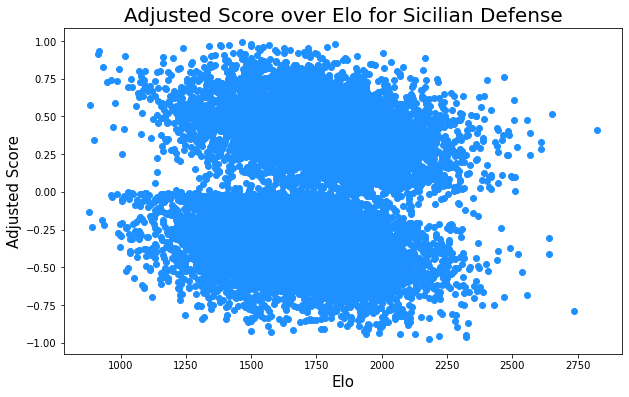

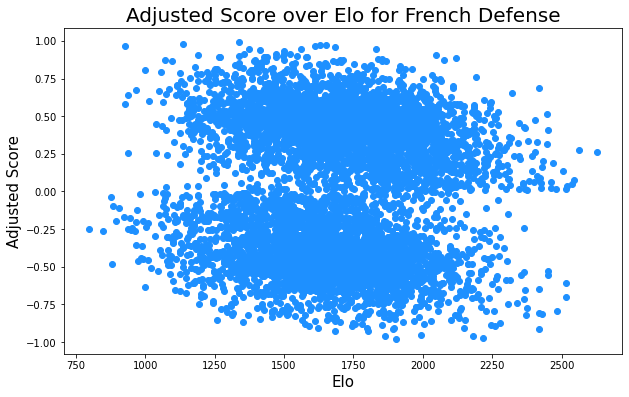

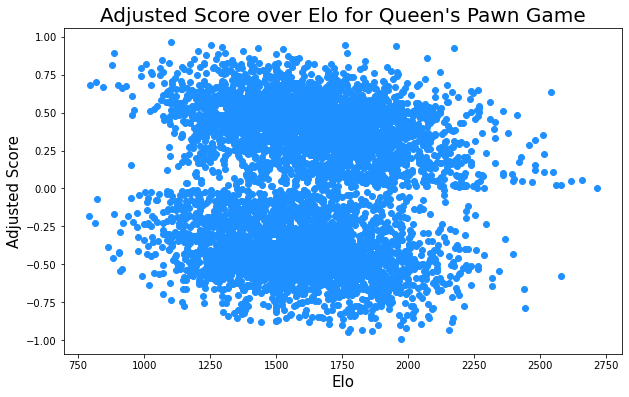

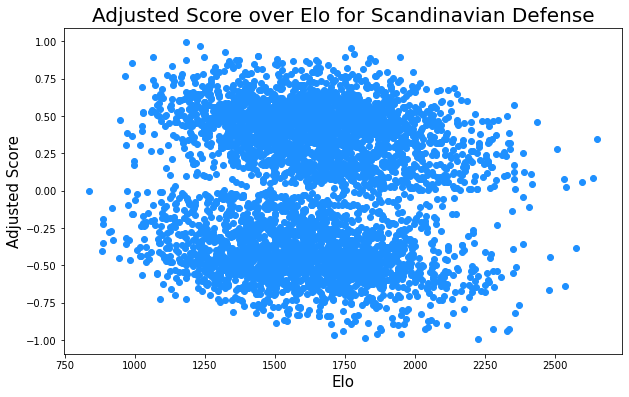

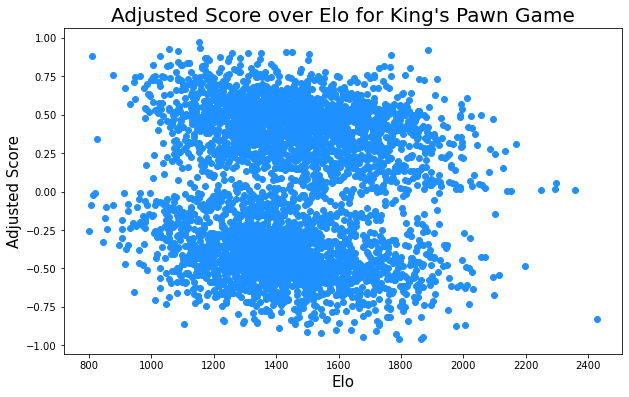

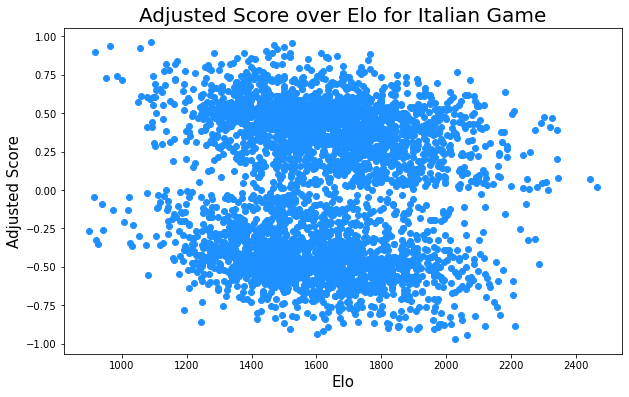

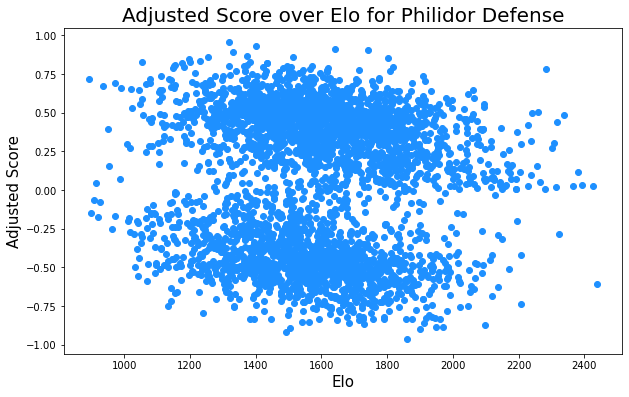

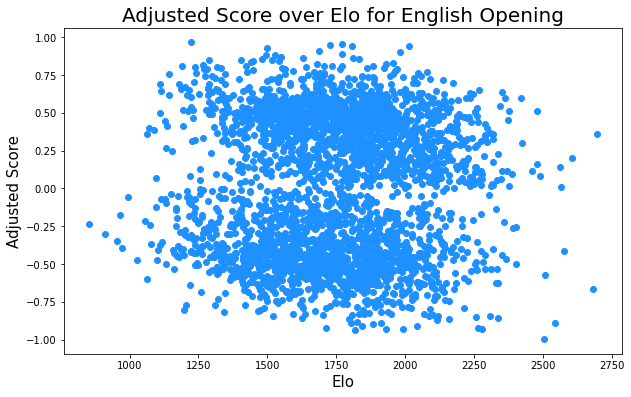

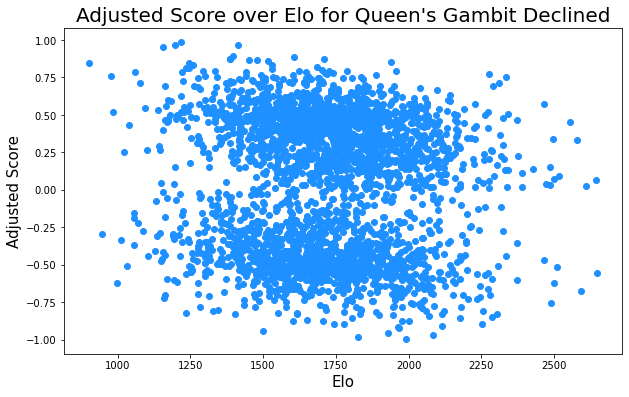

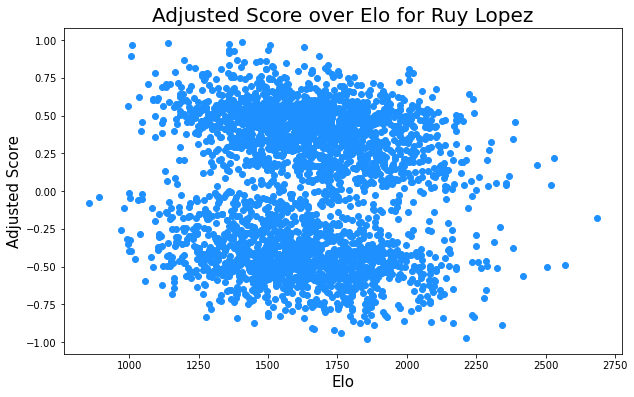

In [277]:
# Gets a sample of size sample_size

sample_size = 10 ** 5
sample_df = normal_df.sample(sample_size)

# Plots a scatter plot for all the openings in the top 10

for opening in top_10:
    opening_slice = sample_df.loc[normal_df["Opening"] == opening]
    fig5, ax5 = plt.subplots(figsize=(10, 6))
    x5 = opening_slice["WhiteElo"]
    y5 = opening_slice["AdjustedScore"]

    ax5.scatter(x5, y5, color="dodgerblue")
    ax5.set_title(f"Adjusted Score over Elo for the {opening}", fontdict={"fontsize": 20});
    ax5.set_xlabel("Elo", fontdict={"fontsize": 15})
    ax5.set_ylabel("Adjusted Score", fontdict={"fontsize": 15})

Interestingly, it appears our model for adjusted score doesn't output numbers close to 0 very often. This does make sense since it requires white to be extremely favored and win or for a draw to occur when both players are equal. Nonetheless, we still see a few trends:
 * From a preliminary analysis, it seems that the Sicilian Defense and the French Defense offer the highest chances for Black. It may be a reason why they're so popular.
 * Secondly, there does seem to be an overall advantage playing as white with generally, more adjusted scores in the top than the bottom.
 * Thirdly, this plot also demonstrates Elo distribution relatively well given the clustering near 1200-1800 Elo.

___
## Data Modeling

Let's try to make a regression to predict opening effectiveness across Elo rating. Two of the more interesting cases to study would probably be that of the Ruy Lopez, which we pointed out seems to see a spike in popularity for high-level play and the Sicilian Defense, which we've analyzed to be the most popular of openings but also allow for Black to mitigate some of the apparent advantage that White has.

To do so, we'll be using SK-Learn's Linear Model.

___
## Conclusion

Within this tutorial, we've made interesting and valuable insights on the popularity as well as the viability of certain chess openings, mostly as an opportunity to walk through all stages of the data science pipeline from gathering data via lichess' online database and parsing through the PGNs, cleaning and tidying the data by dropping and transforming columns as well as reasoning which observations should be okay to drop given the missingness of the data, analyzing and visualizing the data via matplotlib and lastly, communicating our insights via statistics and modeling.